In [210]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [211]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [212]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
data = np.array(data)

In [214]:
m ,n =data.shape
np.random.shuffle(data)

data_dev =data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.


In [215]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1,b1,W2,b2

In [216]:
def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    

In [217]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [218]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1 
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [219]:
def deriv_ReLU(Z):
    return Z > 0

In [220]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2 

In [221]:
def update_params(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1,W2,b1,b2

In [222]:
def get_predictions(A2):
    return np.argmax(A2,0)
    
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [250]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 500 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [251]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 5000)

Iteration:  0
[2 2 1 ... 9 8 7] [7 3 7 ... 2 1 6]
0.07465853658536585
Iteration:  500
[2 3 7 ... 2 1 6] [7 3 7 ... 2 1 6]
0.8524146341463414
Iteration:  1000
[2 3 7 ... 2 1 6] [7 3 7 ... 2 1 6]
0.8841219512195122
Iteration:  1500
[2 3 7 ... 2 1 6] [7 3 7 ... 2 1 6]
0.8969024390243903
Iteration:  2000
[2 3 7 ... 2 1 6] [7 3 7 ... 2 1 6]
0.9047073170731708
Iteration:  2500
[2 3 7 ... 2 1 6] [7 3 7 ... 2 1 6]
0.9103170731707317
Iteration:  3000
[2 3 7 ... 2 1 6] [7 3 7 ... 2 1 6]
0.9149024390243903
Iteration:  3500
[2 3 7 ... 2 1 6] [7 3 7 ... 2 1 6]
0.9178780487804878
Iteration:  4000
[2 3 7 ... 2 1 6] [7 3 7 ... 2 1 6]
0.9201951219512196
Iteration:  4500
[2 3 7 ... 2 1 6] [7 3 7 ... 2 1 6]
0.9225121951219513


In [253]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


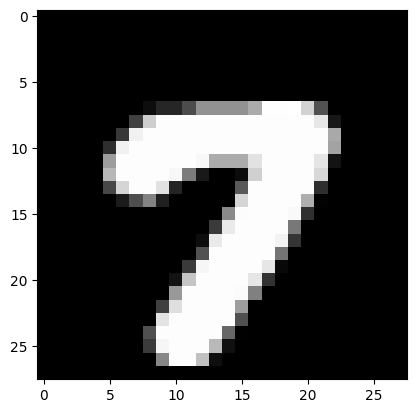

In [255]:
test_prediction(88, W1, b1, W2, b2)